In [357]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [358]:
df = pd.read_csv('data/nodes.csv')
df.columns


Index(['Id', 'Label', 'Description', 'indegree', 'outdegree', 'Degree',
       'modularity_class', 'clustering', 'stat_inf_class', 'Eccentricity',
       'closnesscentrality', 'harmonicclosnesscentrality',
       'betweenesscentrality', 'giantcomponent', 'componentnumber',
       'strongcompnum', 'weighted indegree', 'weighted outdegree',
       'Weighted Degree', 'pageranks', 'eigencentrality'],
      dtype='object')

In [359]:
df['Closeness Centrality'] = df['closnesscentrality']
df['Betweeness Centrality'] = df['betweenesscentrality']
df['Eigenvector Centrality'] = df['eigencentrality']
df['Page Ranks'] = df['pageranks']
columns = ['Closeness Centrality', 'Betweeness Centrality', 'Page Ranks','Eigenvector Centrality']

0        0.227626
1        0.010142
2        0.005119
3        0.004763
4        0.004763
           ...   
23288    0.000309
23289    0.000309
23290    0.000309
23291    0.000309
23292    0.000309
Name: Eigenvector Centrality, Length: 23293, dtype: float64

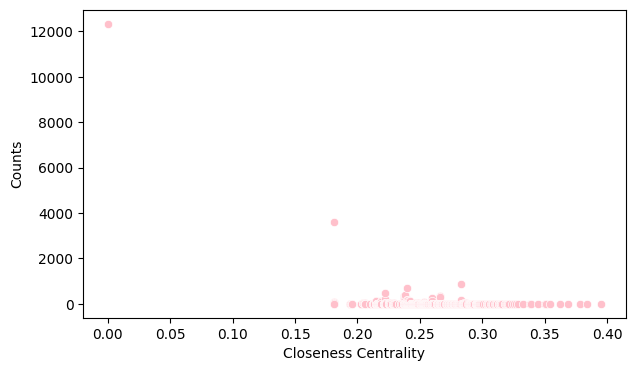

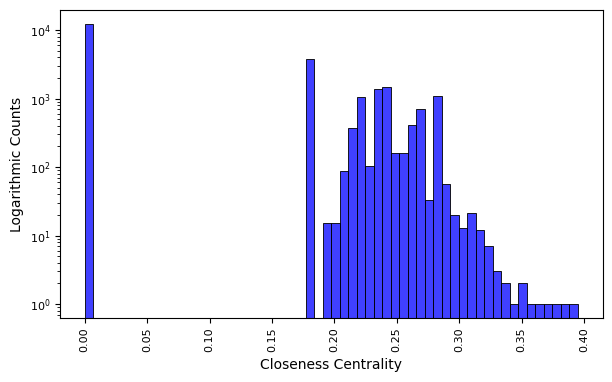

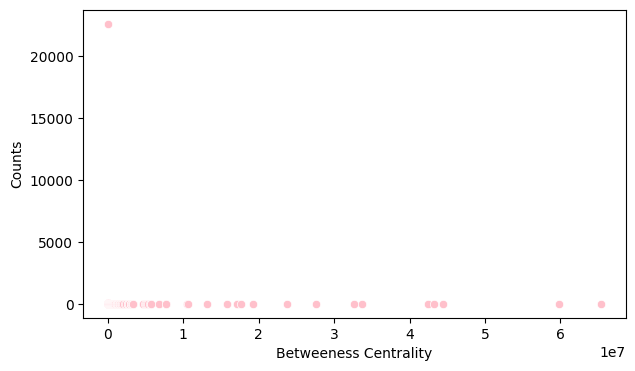

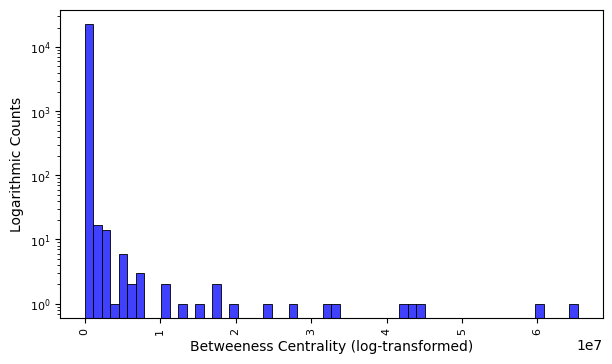

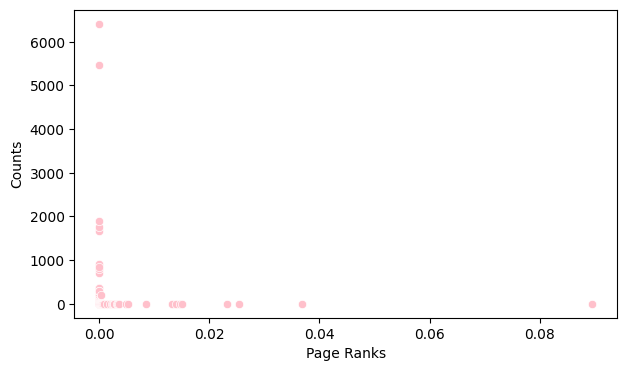

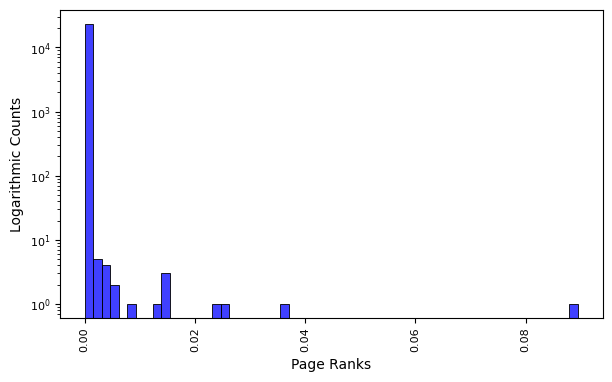

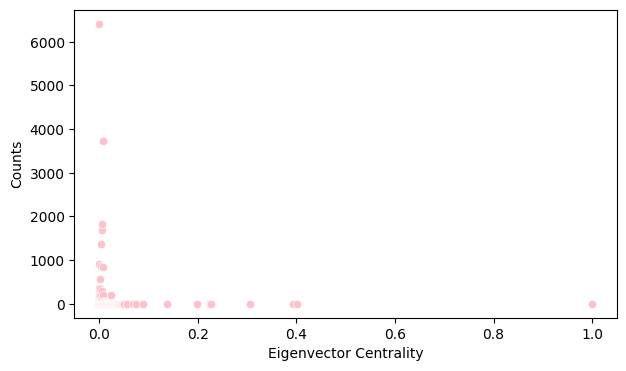

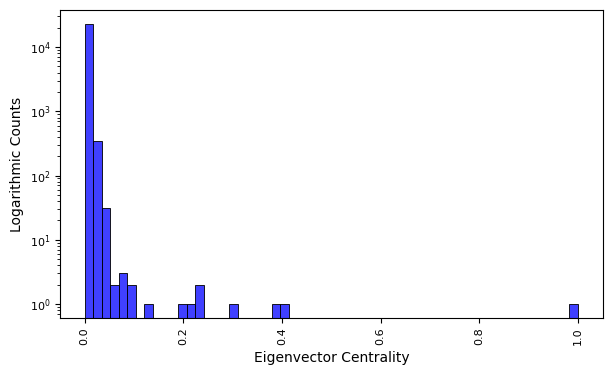

In [360]:
for column in columns:
    if column == 'Betweeness Centrality':
        df2 = df.groupby(column).size().reset_index(name='counts')
        fig = plt.figure(figsize=(7, 4))
        plt.xlabel(f'{column}')
        plt.ylabel('Counts')
        sns.scatterplot(x=column, y='counts', data=df2, color='pink')
        plt.savefig(f'{column}.png')
        plt.figure(figsize=(7, 4))
        df2[column] = np.log10(df2[column] + 1)
        sns.histplot(data=df, x=column, bins="rice", color="blue")
        plt.yscale('log')
        plt.xlabel(f'{column} (log-transformed)')
        plt.ylabel('Logarithmic Counts')
        plt.xticks(fontsize=8, rotation=90)
        plt.yticks(fontsize=8)
        plt.savefig(f'{column}_hist.png')
    else:
        df2 = df.groupby(column).size().reset_index(name='counts')
        fig = plt.figure(figsize=(7, 4))
        plt.xlabel(f'{column}')
        plt.ylabel('Counts')
        sns.scatterplot(x=column, y='counts', data=df2, color='pink')
        plt.savefig(f'{column}.png')
        plt.figure(figsize=(7, 4))
        sns.histplot(data=df, x=column, bins="rice", color="blue")
        plt.xlabel(f'{column}')
        plt.ylabel('Logarithmic Counts')
        plt.xticks(fontsize=8, rotation=90)
        plt.yticks(fontsize=8)
        plt.yscale('log')
        plt.savefig(f'{column}_hist.png')
